In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
taxi_data = pd.read_csv("/content/drive/MyDrive/Taxi_Trips_-_2024_20240408.csv")

In [ ]:
taxi_data.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [ ]:
taxi_data['Trip Start Timestamp']

,Trip Start Timestamp
0,2024-03-01
1,2024-03-01
3,2024-03-01
4,2024-03-01
6,2024-03-01
...,...
865242,2024-01-01
865243,2024-01-01
865244,2024-01-01
865245,2024-01-01


In [ ]:
taxi_data['Trip End Timestamp'].describe()


,Trip End Timestamp
count,773804
unique,5768
top,02/23/2024 07:00:00 PM
freq,407


In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865247 entries, 0 to 865246
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     865247 non-null  object 
 1   Taxi ID                     865246 non-null  object 
 2   Trip Start Timestamp        865247 non-null  object 
 3   Trip End Timestamp          865239 non-null  object 
 4   Trip Seconds                865078 non-null  float64
 5   Trip Miles                  865241 non-null  float64
 6   Pickup Census Tract         327251 non-null  float64
 7   Dropoff Census Tract        313854 non-null  float64
 8   Pickup Community Area       842052 non-null  float64
 9   Dropoff Community Area      781394 non-null  float64
 10  Fare                        863202 non-null  float64
 11  Tips                        863202 non-null  float64
 12  Tolls                       863202 non-null  float64
 13  Extras        

In [ ]:
taxi_data['Trip Start Timestamp'].

In [ ]:
taxi_data.shape[0]

865247

In [ ]:
pickup_census_NaN = taxi_data['Pickup Census Tract'].isna().sum()
print(pickup_census_NaN)

537996


In [ ]:
dropoff_census_NaN = taxi_data['Dropoff Census Tract'].isna().sum()
print(dropoff_census_NaN)

551393


In [ ]:
taxi_data['Dropoff Census Tract'].isna().describe()

,Dropoff Census Tract
count,865247
unique,2
top,True
freq,551393


In [ ]:
taxi_data.drop(columns=['Pickup Census Tract','Dropoff Census Tract'])

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,8.0,8.0,3.25,0.00,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,24.0,8.0,12.00,0.00,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,56.0,NaN,16.75,4.45,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,76.0,3.0,34.75,7.85,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,8.0,3.0,18.51,4.31,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865242,9e8e52afb83340357ee83796469162c7d8774099,bb277fc77c865565c0fc305dcad0c6b6633e72ce0fcfac...,01/01/2024 12:00:00 AM,01/01/2024 12:00:00 AM,347.0,1.17,6.0,7.0,6.25,0.00,...,0.0,6.25,Cash,Chicago Independents,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
865243,ea3edb137b267a462a73c53fa2e354f60746560e,931225a382fc38a75212f9d358439aec0d9b50fdaf32ad...,01/01/2024 12:00:00 AM,01/01/2024 12:15:00 AM,1193.0,10.58,56.0,28.0,28.00,4.00,...,6.0,38.50,Credit Card,Flash Cab,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
865244,ddcd4d6b7c138bee6841a7800cfbb45f31e6101a,0fdab9be71f6d88e3d3a2e115afc5a33d2bf74153792c5...,01/01/2024 12:00:00 AM,01/01/2024 12:45:00 AM,3059.0,17.44,76.0,32.0,50.75,11.05,...,4.0,66.30,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
865245,bdc420394ce5e864465df0a361dfbe95a4e228c4,389f01c14b097ed951468ff163ccc71ebcb99a27e523e9...,01/01/2024 12:00:00 AM,01/01/2024 12:30:00 AM,1369.0,3.07,8.0,24.0,14.50,10.00,...,1.0,26.00,Mobile,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)


In [ ]:
missing_values = taxi_data.isna().sum()
print(missing_values)

Trip ID                            0
Taxi ID                            1
Trip Start Timestamp               0
Trip End Timestamp                 8
Trip Seconds                     169
Trip Miles                         6
Pickup Census Tract           537996
Dropoff Census Tract          551393
Pickup Community Area          23195
Dropoff Community Area         83853
Fare                            2045
Tips                            2045
Tolls                           2045
Extras                          2045
Trip Total                      2045
Payment Type                       0
Company                            0
Pickup Centroid Latitude       22966
Pickup Centroid Longitude      22966
Pickup Centroid Location       22966
Dropoff Centroid Latitude      79675
Dropoff Centroid Longitude     79675
Dropoff Centroid  Location     79675
dtype: int64


In [ ]:
taxi_data = taxi_data.drop(['Pickup Census Tract','Dropoff Census Tract'],axis=1)

In [ ]:
taxi_data =taxi_data.dropna()

In [ ]:
taxi_data.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000,773804.000000
mean,1110.811221,6.084376,34.433178,25.768254,20.636600,2.577278,0.050371,1.307490,24.744691,41.898875,-87.693469,41.891662,-87.658097
std,1462.267015,7.486245,25.465230,20.433198,20.497516,3.747523,13.634970,18.829252,37.905415,0.064426,0.108441,0.059012,0.065795
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.650222,-87.913625
25%,443.000000,0.900000,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.750000,41.878866,-87.699155,41.878866,-87.663518
50%,853.000000,2.620000,32.000000,28.000000,13.920000,0.010000,0.000000,0.000000,16.500000,41.893216,-87.642498,41.892508,-87.633308
75%,1548.000000,11.250000,56.000000,32.000000,32.250000,3.650000,0.000000,1.000000,35.800000,41.953582,-87.625192,41.922686,-87.625192
max,86340.000000,3093.470000,77.000000,77.000000,9999.750000,200.000000,4444.440000,5051.100000,9999.750000,42.021224,-87.534903,42.021224,-87.534903


In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773804 entries, 0 to 865246
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     773804 non-null  object 
 1   Taxi ID                     773804 non-null  object 
 2   Trip Start Timestamp        773804 non-null  object 
 3   Trip End Timestamp          773804 non-null  object 
 4   Trip Seconds                773804 non-null  float64
 5   Trip Miles                  773804 non-null  float64
 6   Pickup Community Area       773804 non-null  float64
 7   Dropoff Community Area      773804 non-null  float64
 8   Fare                        773804 non-null  float64
 9   Tips                        773804 non-null  float64
 10  Tolls                       773804 non-null  float64
 11  Extras                      773804 non-null  float64
 12  Trip Total                  773804 non-null  float64
 13  Payment Type       

In [ ]:
duplicates = taxi_data.duplicated().sum()
print(duplicates)

0


In [ ]:
import datetime

In [ ]:
selectedNumericalStats = taxi_data[['Pickup Community Area','Dropoff Community Area','Trip Miles','Trip Seconds']].describe()
print(selectedNumericalStats)

       Pickup Community Area  Dropoff Community Area     Trip Miles  \
count          773804.000000           773804.000000  773804.000000   
mean               34.433178               25.768254       6.084376   
std                25.465230               20.433198       7.486245   
min                 1.000000                1.000000       0.000000   
25%                 8.000000                8.000000       0.900000   
50%                32.000000               28.000000       2.620000   
75%                56.000000               32.000000      11.250000   
max                77.000000               77.000000    3093.470000   

        Trip Seconds  
count  773804.000000  
mean     1110.811221  
std      1462.267015  
min         0.000000  
25%       443.000000  
50%       853.000000  
75%      1548.000000  
max     86340.000000  


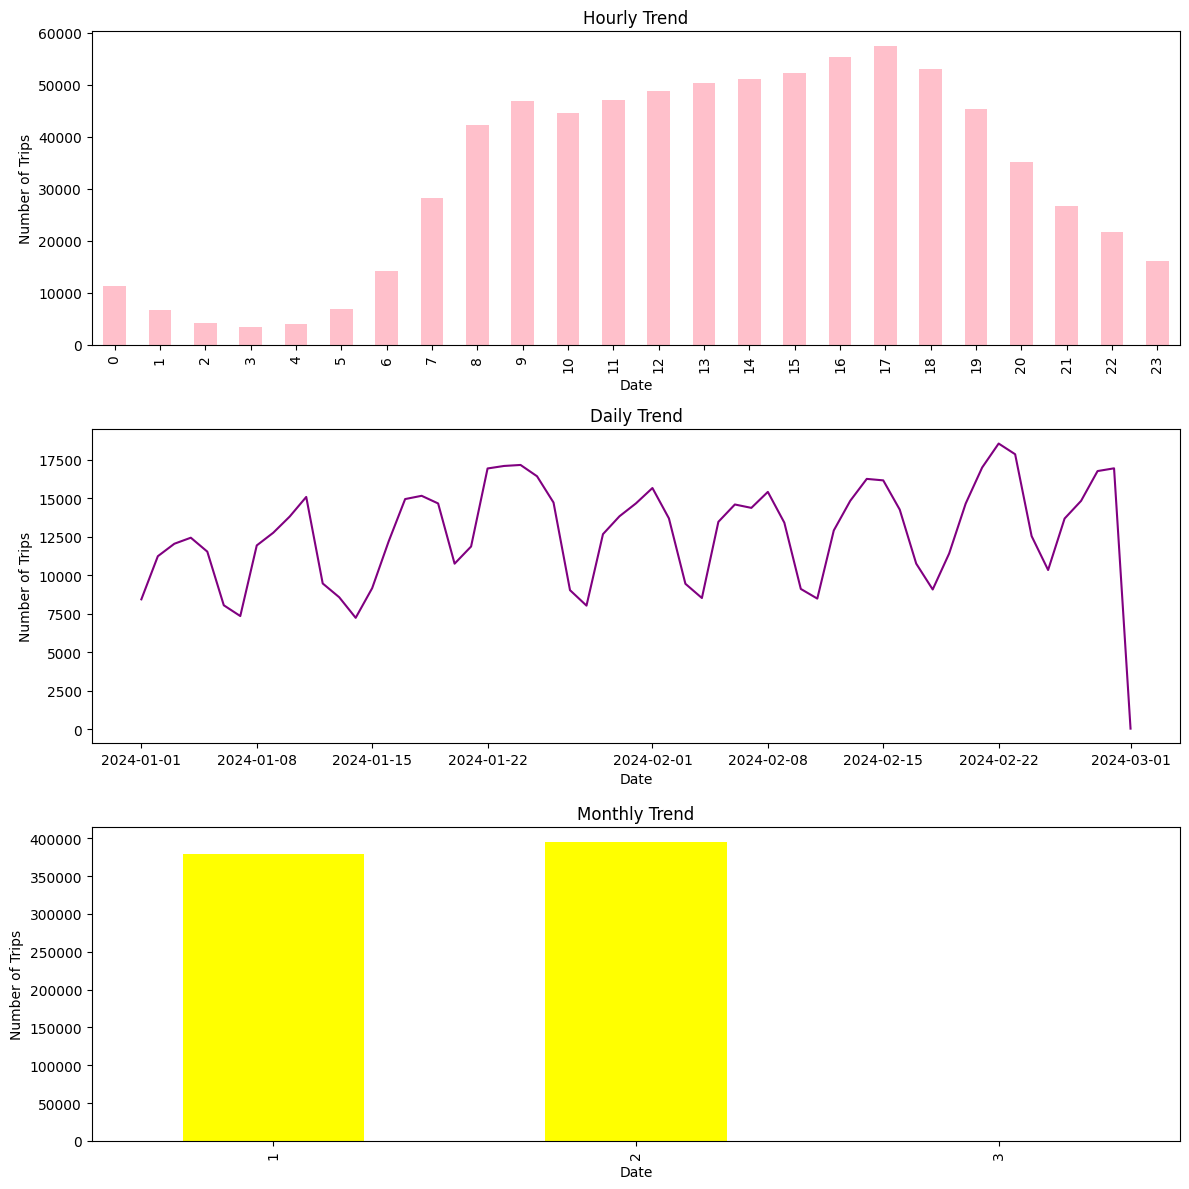

2024-01-01 00:00:00
2024-03-01 00:00:00


In [ ]:
#Convert Trip Start Timestamp column to datetime format
taxi_data['Trip Start Timestamp'] = pd.to_datetime(taxi_data['Trip Start Timestamp'],format='%m/%d/%Y %I:%M:%S %p')

#Extract date and time components
taxi_data['date'] = taxi_data['Trip Start Timestamp'].dt.date
taxi_data['hour'] = taxi_data['Trip Start Timestamp'].dt.hour
taxi_data['day_of_week'] = taxi_data['Trip Start Timestamp'].dt.dayofweek
taxi_data['month'] = taxi_data['Trip Start Timestamp'].dt.month

#Plot number of trips over hourly, daily, and monthly trends
fig,axes = plt.subplots(3,1,figsize=(12,12))

#Hourly trend
hourly_trips = taxi_data.groupby('hour').size()
hourly_trips.plot(ax=axes[0],kind='bar', color='pink')
axes[0].set_title('Hourly Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Trips')

#Daily Trend
daily_trips = taxi_data.groupby('date').size()
daily_trips.plot(ax=axes[1],color='purple')
axes[1].set_title('Daily Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Trips')


#Monthly trend
monthly_trips = taxi_data.groupby('month').size()
monthly_trips.plot(ax=axes[2],kind = 'bar',color = 'yellow')
axes[2].set_title('Monthly Trend')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

oldest_date = taxi_data['Trip Start Timestamp'].min()
print(oldest_date)
latest_date = taxi_data['Trip Start Timestamp'].max()
print(latest_date)

In [ ]:
taxi_data['Trip End Timestamp'] = pd.to_datetime(taxi_data['Trip End Timestamp'],format='%m/%d/%Y %I:%M:%S %p')
oldest_date = taxi_data['Trip End Timestamp'].min()
print(oldest_date)
latest_date = taxi_data['Trip End Timestamp'].max()
print(latest_date)

2024-01-01 00:00:00
2024-03-01 14:30:00
